# Q1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
import time
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors

In [2]:
data = pd.read_csv('Data.csv')
data

,id,age,sex,region,salary,married,children,car
0,ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO
1,ID12102,40,MALE,TOWN,30085.10,YES,3,YES
2,ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES
3,ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO
4,ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO
...,...,...,...,...,...,...,...,...
595,ID12696,61,FEMALE,INNER_CITY,47025.00,NO,2,YES
596,ID12697,30,FEMALE,INNER_CITY,9672.25,YES,0,YES
597,ID12698,31,FEMALE,TOWN,15976.30,YES,0,YES
598,ID12699,29,MALE,INNER_CITY,14711.80,YES,0,NO


In [3]:
#Checking if there are any null values in data frame
data.isna().sum()

id          0
age         0
sex         0
region      0
salary      0
married     0
children    0
car         0
dtype: int64

In [4]:
#Droping the id column as it is a nominal attribute and it is only used for identifying data uniquely and doesnot give any information
data = data.drop('id', axis='columns')

In [5]:
# discretize the 'age' attribute into three bins
age_bins = [0, 30, 50, 100]
age_labels = ['Young', 'MiddleAged', 'Old']
data['agebins'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)
data[['age', 'agebins']]

,age,agebins
0,48,MiddleAged
1,40,MiddleAged
2,51,Old
3,23,Young
4,57,Old
...,...,...
595,61,Old
596,30,Young
597,31,MiddleAged
598,29,Young


In [6]:
#Normalizing data will eliminate big dominating values such as of age and salary. After normalizing we will have values in range of 0 to 1
scaler = MinMaxScaler()
data[['age', 'salary']] = scaler.fit_transform(data[['age','salary']])
data

,age,sex,region,salary,married,children,car,agebins
0,0.612245,FEMALE,INNER_CITY,0.215634,NO,1,NO,MiddleAged
1,0.448980,MALE,TOWN,0.431395,YES,3,YES,MiddleAged
2,0.673469,FEMALE,INNER_CITY,0.198933,YES,0,YES,Old
3,0.102041,FEMALE,TOWN,0.264320,YES,3,NO,Young
4,0.795918,FEMALE,RURAL,0.783987,YES,0,NO,Old
...,...,...,...,...,...,...,...,...
595,0.877551,FEMALE,INNER_CITY,0.722880,NO,2,YES,Old
596,0.244898,FEMALE,INNER_CITY,0.080151,YES,0,YES,Young
597,0.265306,FEMALE,TOWN,0.188625,YES,0,YES,MiddleAged
598,0.224490,MALE,INNER_CITY,0.166866,YES,0,NO,Young


In [7]:
#Checking correlation
data.corr(method ='pearson')

,age,salary,children
age,1.000000,0.752726,0.023572
salary,0.752726,1.000000,0.036761
children,0.023572,0.036761,1.000000


In [8]:
data['region'].unique()

array(['INNER_CITY', 'TOWN', 'RURAL', 'SUBURBAN'], dtype=object)

In [9]:
#Encoding the ordinal values in attributes which will make easy for processing
data['married'] = data['married'].map({'YES': 1, 'NO': 0})
data['car'] = data['car'].map({'YES': 1, 'NO': 0})
data['sex'] = data['sex'].map({'FEMALE': 1, 'MALE': 0})
data['region'] = data['region'].map({'INNER_CITY': 0, 'TOWN': 1, 'RURAL':2, 'SUBURBAN':3})

data

,age,sex,region,salary,married,children,car,agebins
0,0.612245,1,0,0.215634,0,1,0,MiddleAged
1,0.448980,0,1,0.431395,1,3,1,MiddleAged
2,0.673469,1,0,0.198933,1,0,1,Old
3,0.102041,1,1,0.264320,1,3,0,Young
4,0.795918,1,2,0.783987,1,0,0,Old
...,...,...,...,...,...,...,...,...
595,0.877551,1,0,0.722880,0,2,1,Old
596,0.244898,1,0,0.080151,1,0,1,Young
597,0.265306,1,1,0.188625,1,0,1,MiddleAged
598,0.224490,0,0,0.166866,1,0,0,Young


# Q2

In [10]:
#selecting subsets as clusters
subset1 = data.iloc[:,[0, 3]]
subset1

,age,salary
0,0.612245,0.215634
1,0.448980,0.431395
2,0.673469,0.198933
3,0.102041,0.264320
4,0.795918,0.783987
...,...,...
595,0.877551,0.722880
596,0.244898,0.080151
597,0.265306,0.188625
598,0.224490,0.166866


In [11]:
subset2 = data.iloc[:,[3, 5]]
subset2

,salary,children
0,0.215634,1
1,0.431395,3
2,0.198933,0
3,0.264320,3
4,0.783987,0
...,...,...
595,0.722880,2
596,0.080151,0
597,0.188625,0
598,0.166866,0


In [12]:
subset3 = data.iloc[:,[2, 3]]
subset3

,region,salary
0,0,0.215634
1,1,0.431395
2,0,0.198933
3,1,0.264320
4,2,0.783987
...,...,...
595,0,0.722880
596,0,0.080151
597,1,0.188625
598,0,0.166866


# Q3

In [13]:
#For Subset1

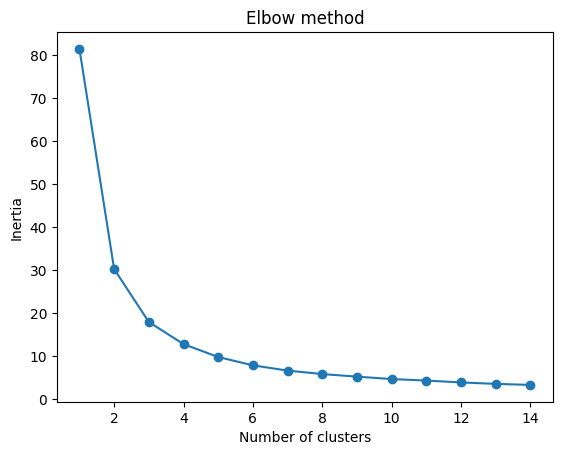

In [14]:
inertias = []

for i in range(1,15):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(subset1)
  inertias.append(kmeans.inertia_)
  
plt.plot(range(1,15), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

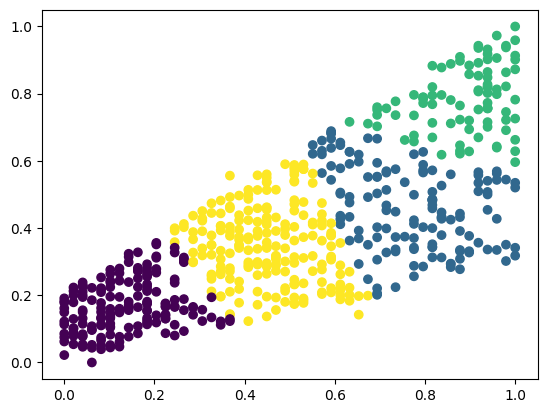

In [15]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(subset1)
plt.scatter(subset1.iloc[:,0],subset1.iloc[:,1], c = kmeans.labels_ )
plt.show()

In [16]:
#analysing the different values at different values of k
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k)
    start_time = time.time()
    kmeans.fit(subset1)
    end_time = time.time()
    print("K = ", k)
    print("Sum of square error = " , kmeans.inertia_)
    print("Silhouette score = " , silhouette_score(subset1, kmeans.labels_))
    print("Iterations to convergence = " , kmeans.n_iter_)
    print("Time = " , end_time-start_time)
    print("---------------------------------------------------------------")

K =  2
Sum of square error =  30.23200360480138
Silhouette score =  0.5073406400014452
Iterations to convergence =  8
Time =  0.050722360610961914
---------------------------------------------------------------
K =  3
Sum of square error =  17.921141663451667
Silhouette score =  0.45463038228367225
Iterations to convergence =  8
Time =  0.03505969047546387
---------------------------------------------------------------
K =  4
Sum of square error =  12.770387925115786
Silhouette score =  0.43618828185611086
Iterations to convergence =  14
Time =  0.04209470748901367
---------------------------------------------------------------
K =  5
Sum of square error =  9.778215078523898
Silhouette score =  0.442348269610333
Iterations to convergence =  11
Time =  0.03901076316833496
---------------------------------------------------------------
K =  6
Sum of square error =  7.840095576629746
Silhouette score =  0.440773211684074
Iterations to convergence =  8
Time =  0.04613494873046875
---------

In [17]:
#For Subset2

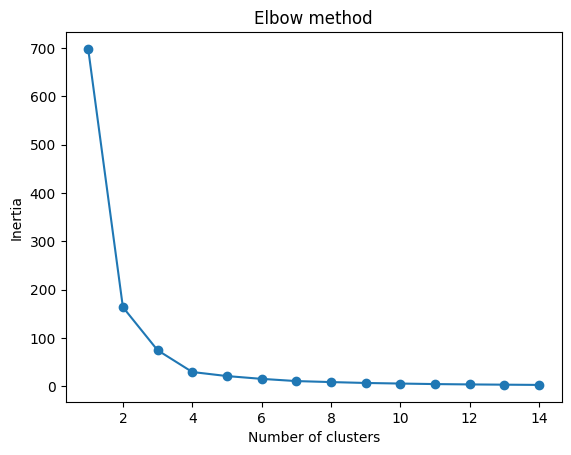

In [18]:
inertias = []

for i in range(1,15):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(subset2)
  inertias.append(kmeans.inertia_)
  
plt.plot(range(1,15), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

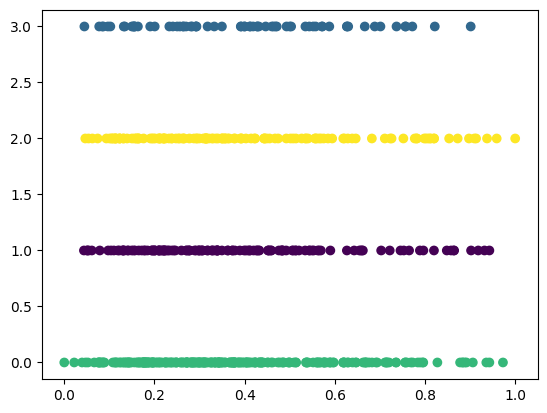

In [19]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(subset2)
plt.scatter(subset2.iloc[:,0], subset2.iloc[:,1], c = kmeans.labels_ )
plt.show()

In [20]:
#analysing the different values at different values of k
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k)
    start_time = time.time()
    kmeans.fit(subset2)
    end_time = time.time()
    print("K = ", k)
    print("Sum of square error = " , kmeans.inertia_)
    print("Silhouette score = " , silhouette_score(subset2, kmeans.labels_))
    print("Iterations to convergence = " , kmeans.n_iter_)
    print("Time = " , end_time-start_time)
    print("---------------------------------------------------------------")

K =  2
Sum of square error =  163.77811306344714
Silhouette score =  0.6745770432613153
Iterations to convergence =  3
Time =  0.04093742370605469
---------------------------------------------------------------
K =  3
Sum of square error =  74.56802503260347
Silhouette score =  0.6899505922084933
Iterations to convergence =  2
Time =  0.024207353591918945
---------------------------------------------------------------
K =  4
Sum of square error =  29.455869385500627
Silhouette score =  0.7631819273447408
Iterations to convergence =  2
Time =  0.02668166160583496
---------------------------------------------------------------
K =  5
Sum of square error =  21.040178041428327
Silhouette score =  0.7002982609325543
Iterations to convergence =  5
Time =  0.031687259674072266
---------------------------------------------------------------
K =  6
Sum of square error =  15.246236974153174
Silhouette score =  0.6768057981612081
Iterations to convergence =  5
Time =  0.03877997398376465
--------

In [21]:
#For Subset3

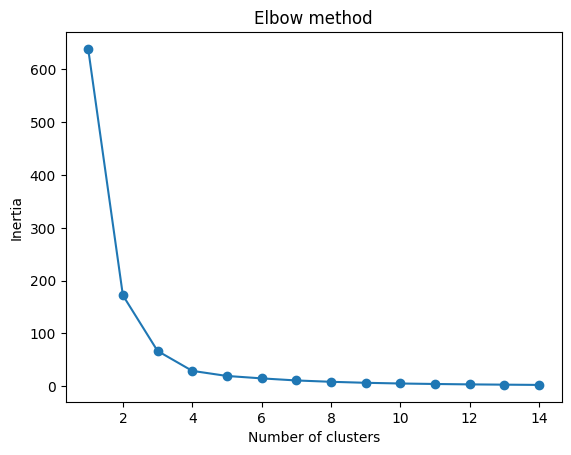

In [22]:
inertias = []

for i in range(1,15):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(subset3)
  inertias.append(kmeans.inertia_)
  
plt.plot(range(1,15), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

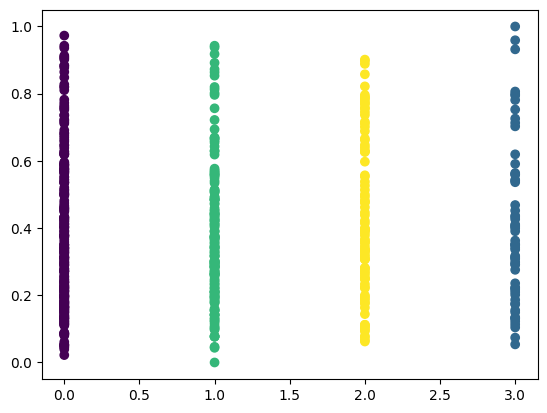

In [23]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(subset3)
plt.scatter(subset3.iloc[:,0], subset3.iloc[:,1], c = kmeans.labels_ )
plt.show()

In [24]:
#analysing the different values at different values of k
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k)
    start_time = time.time()
    kmeans.fit(subset3)
    end_time = time.time()
    print("K = ", k)
    print("Sum of square error = " , kmeans.inertia_)
    print("Silhouette score = " , silhouette_score(subset3, kmeans.labels_))
    print("Iterations to convergence = " , kmeans.n_iter_)
    print("Time = " , end_time-start_time)
    print("---------------------------------------------------------------")

K =  2
Sum of square error =  172.2236712317982
Silhouette score =  0.6642639667338099
Iterations to convergence =  2
Time =  0.0375828742980957
---------------------------------------------------------------
K =  3
Sum of square error =  66.93623730793264
Silhouette score =  0.7048406024562126
Iterations to convergence =  3
Time =  0.025227785110473633
---------------------------------------------------------------
K =  4
Sum of square error =  29.244378820574482
Silhouette score =  0.7638263981227069
Iterations to convergence =  2
Time =  0.02895951271057129
---------------------------------------------------------------
K =  5
Sum of square error =  19.613178323520316
Silhouette score =  0.7021014616777228
Iterations to convergence =  5
Time =  0.039606571197509766
---------------------------------------------------------------
K =  6
Sum of square error =  15.038736146377813
Silhouette score =  0.6446393573862423
Iterations to convergence =  7
Time =  0.0316617488861084
-----------

# Q4

In [25]:
#For Subset1

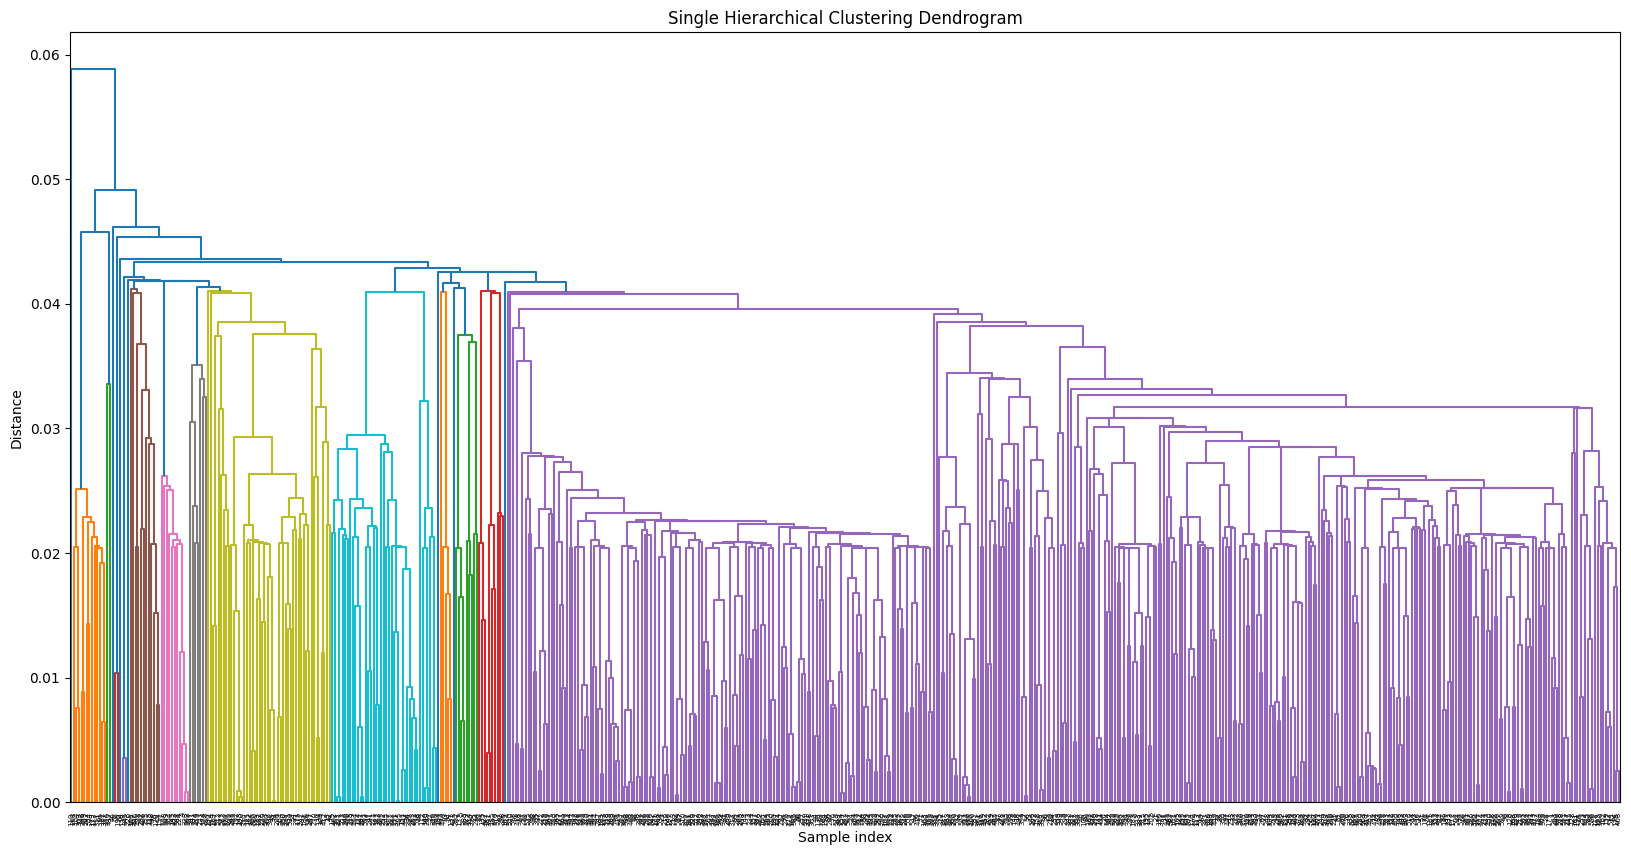

Time =  3.787274122238159


In [26]:
start_time = time.time()
D = linkage(subset1, 'single')
# dendrogram
plt.figure(figsize=(20, 10))
plt.title('Single Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(D)
plt.show()
end_time = time.time()
print("Time = " , end_time-start_time)

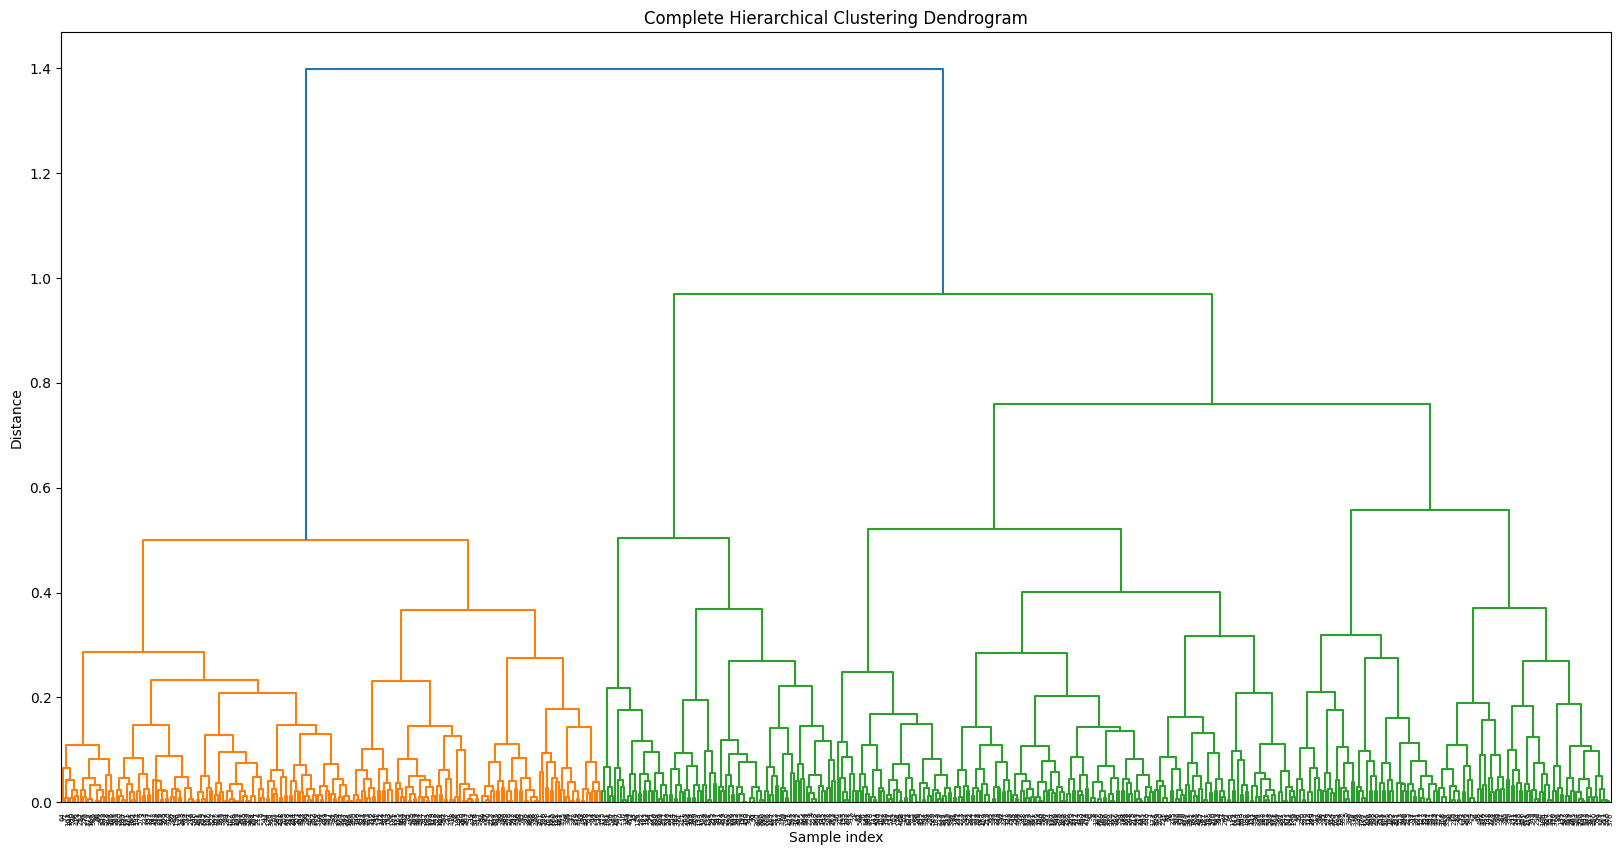

Time =  4.301052093505859


In [27]:
start_time = time.time()
D = linkage(subset1, 'complete')
# dendrogram
plt.figure(figsize=(20, 10))
plt.title('Complete Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(D)
plt.show()
end_time = time.time()
print("Time = " , end_time-start_time)

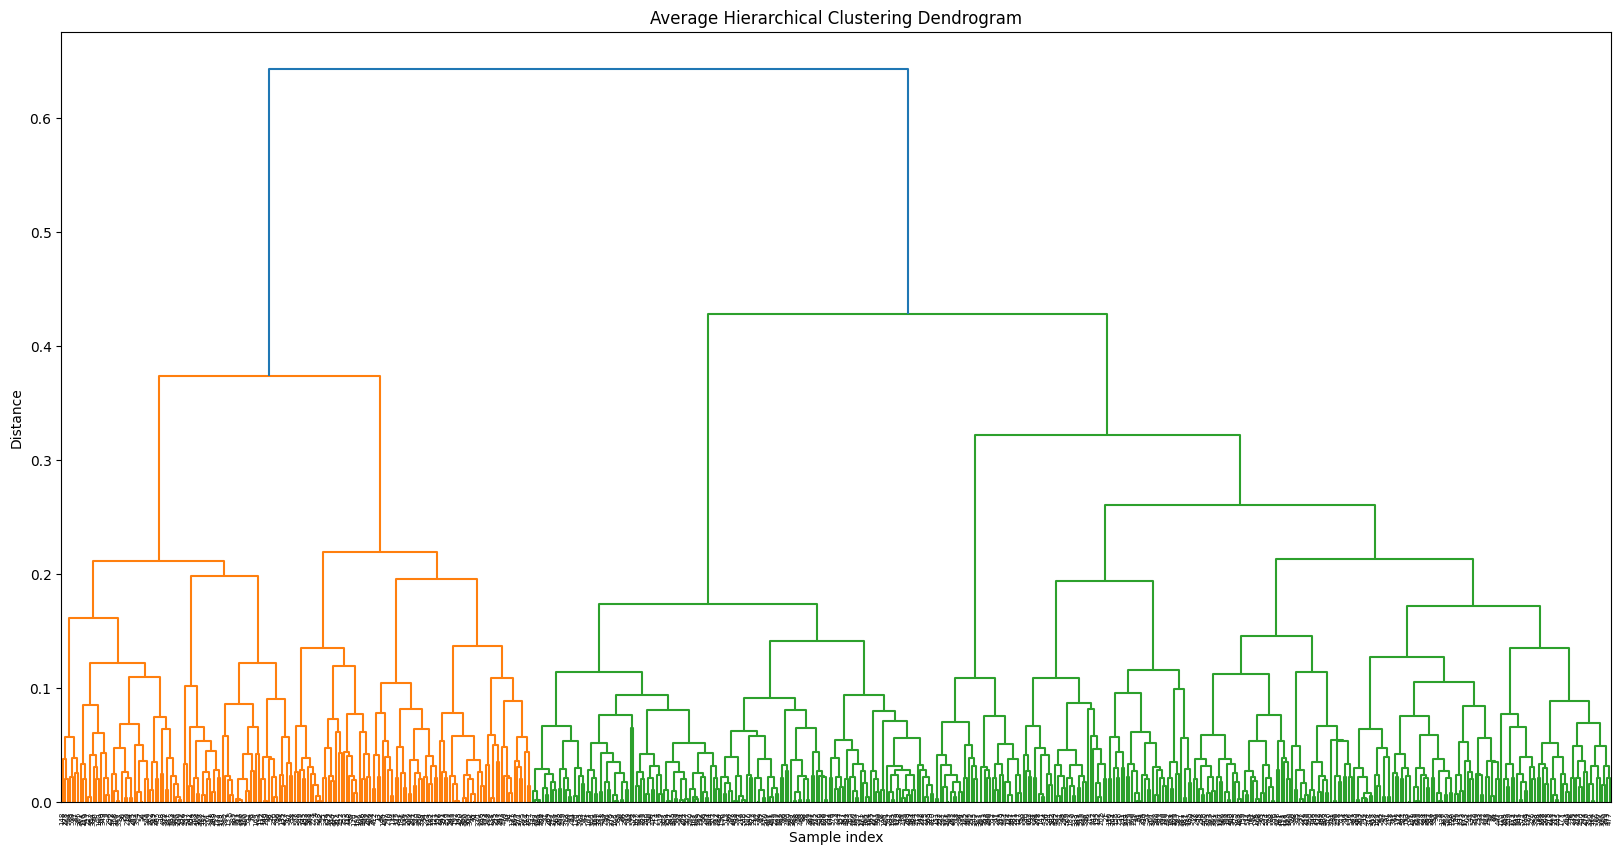

Time =  4.202306509017944


In [28]:
start_time = time.time()
D = linkage(subset1, 'average')
# dendrogram
plt.figure(figsize=(20, 10))
plt.title('Average Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(D)
plt.show()
end_time = time.time()
print("Time = " , end_time-start_time)

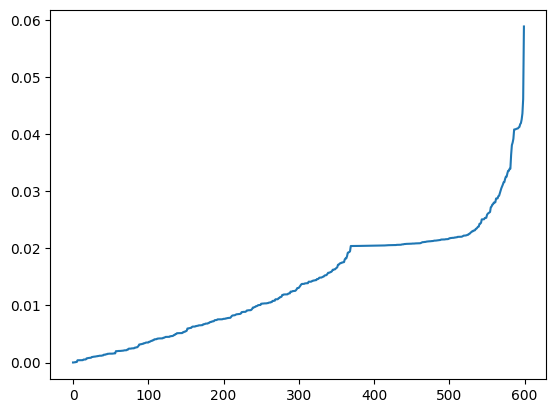

In [29]:
#This will tell us the eps
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(subset1)
distances, indices = neighbors_fit.kneighbors(subset1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

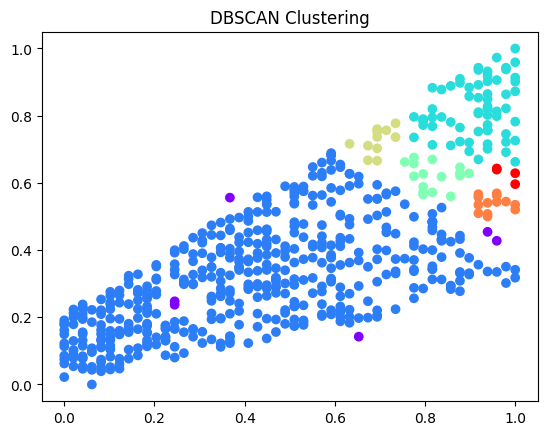

Time =  0.1592724323272705


In [30]:
start_time = time.time()
db_default = DBSCAN(eps = 0.045, min_samples = 4).fit(subset1)  
# Labelling the clusters we have created in the dataset  
labeling = db_default.labels_
plt.scatter(subset1.iloc[:,0],subset1.iloc[:,1], c=labeling, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.show()
end_time = time.time()
print("Time = " , end_time-start_time)

In [31]:
#For Subset2

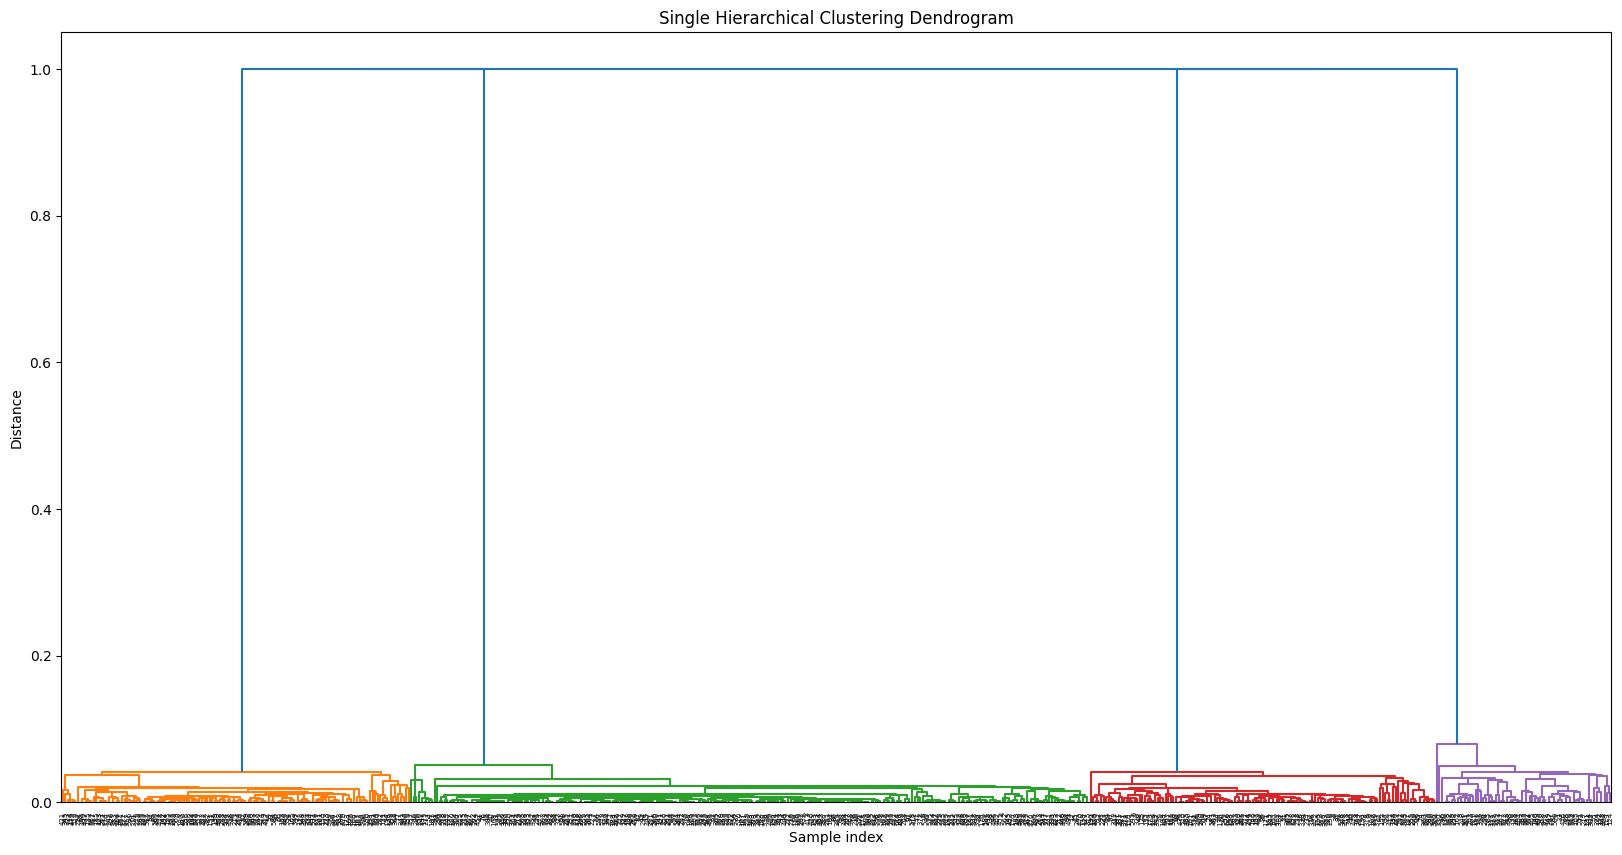

Time =  4.795807123184204


In [32]:
start_time = time.time()
D = linkage(subset2, 'single')
# dendrogram
plt.figure(figsize=(20, 10))
plt.title('Single Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(D)
plt.show()
end_time = time.time()
print("Time = " , end_time-start_time)

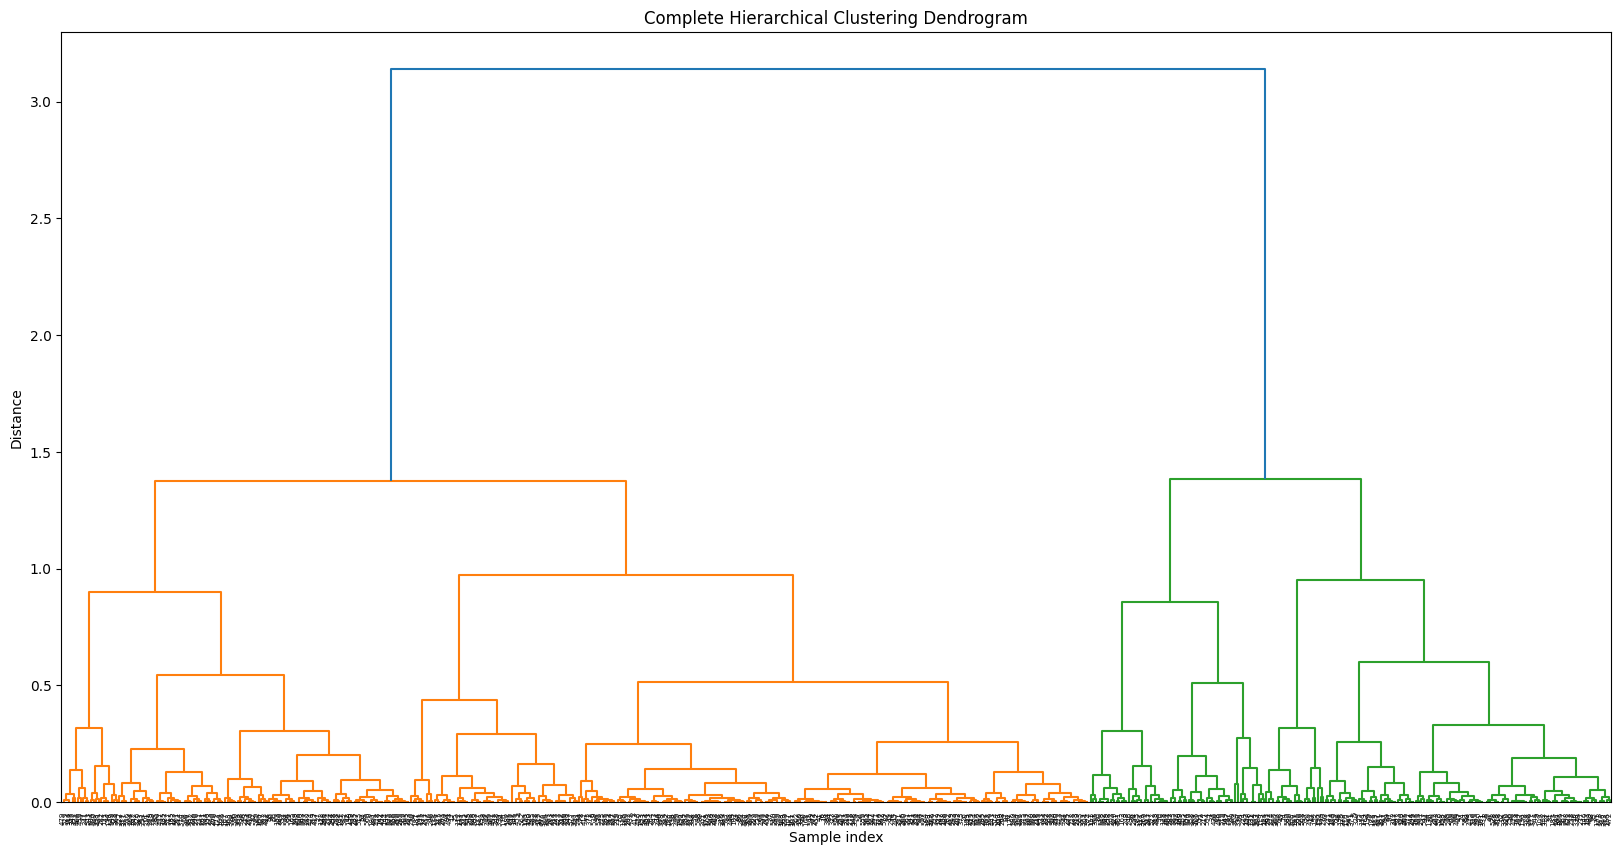

Time =  5.370672941207886


In [33]:
start_time = time.time()
D = linkage(subset2, 'complete')
# dendrogram
plt.figure(figsize=(20, 10))
plt.title('Complete Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(D)
plt.show()
end_time = time.time()
print("Time = " , end_time-start_time)

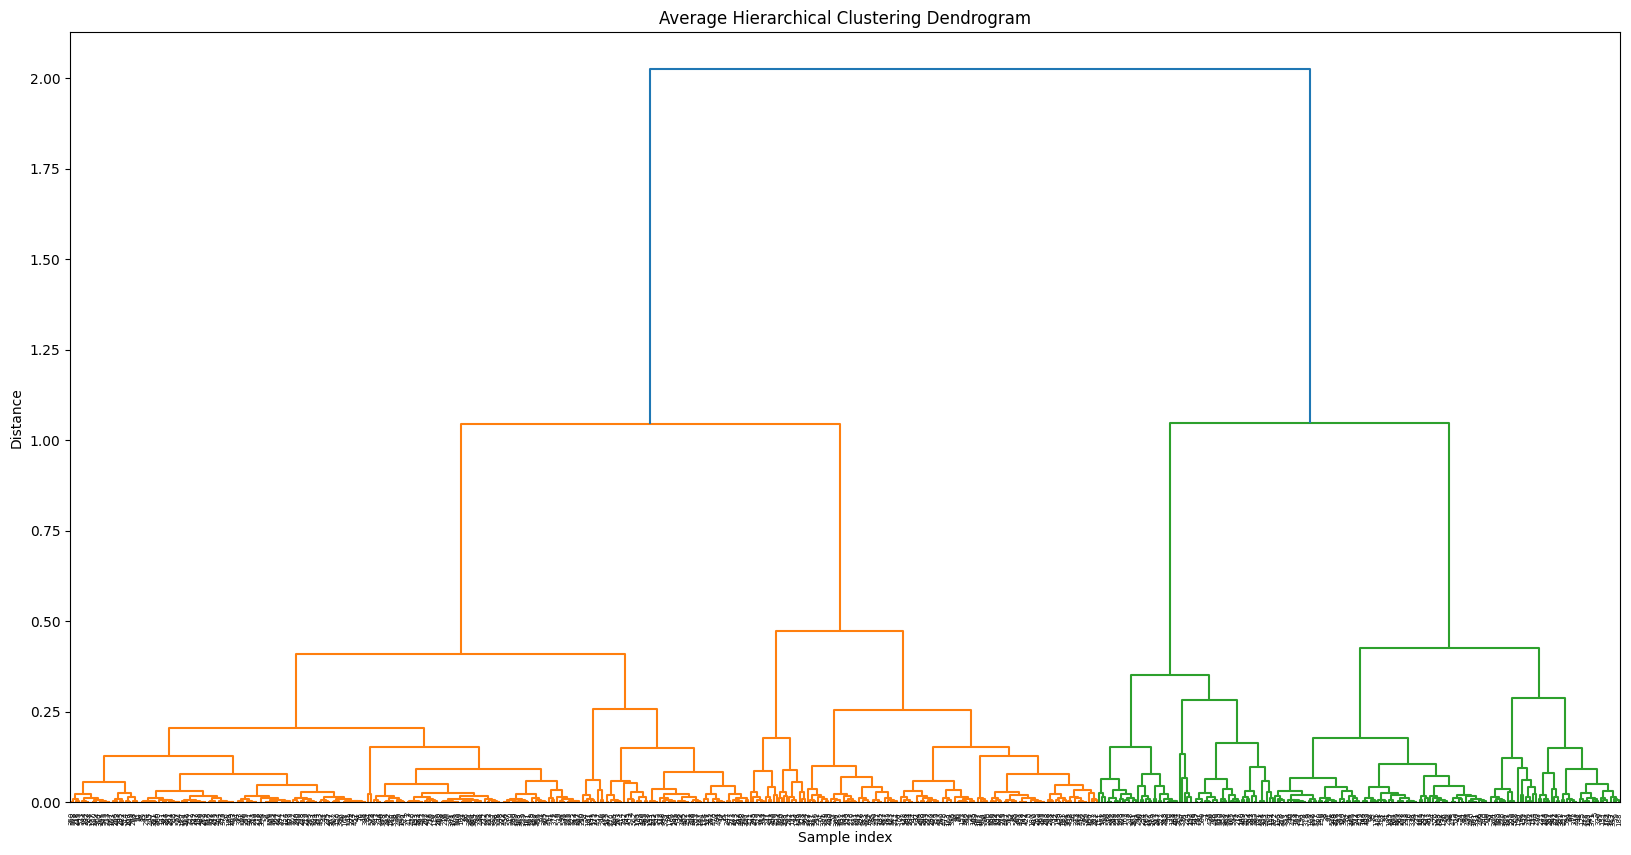

Time =  4.346997022628784


In [34]:
start_time = time.time()
D = linkage(subset2, 'average')
# dendrogram
plt.figure(figsize=(20, 10))
plt.title('Average Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(D)
plt.show()
end_time = time.time()
print("Time = " , end_time-start_time)

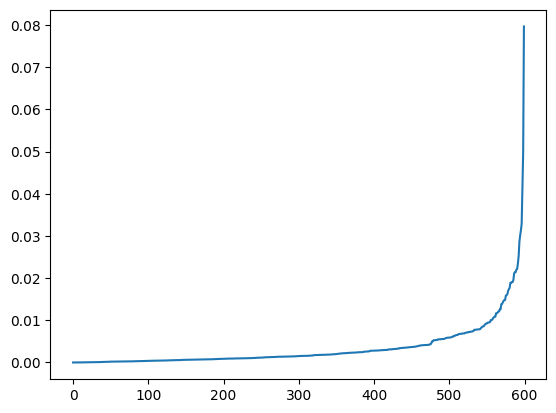

In [35]:
#This will tell us the eps
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(subset2)
distances, indices = neighbors_fit.kneighbors(subset2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

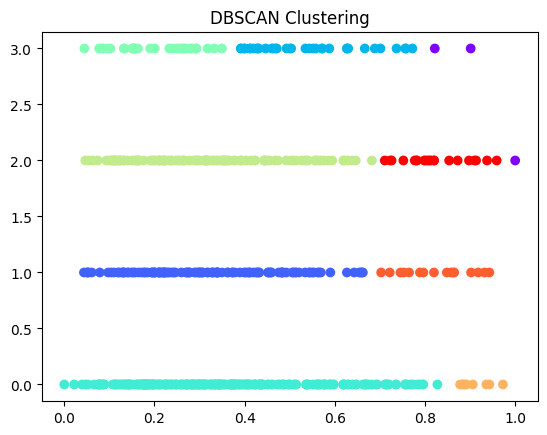

Time =  0.24766993522644043


In [36]:
start_time = time.time()
db_default = DBSCAN(eps = 0.04, min_samples = 4).fit(subset2)  
# Labelling the clusters we have created in the dataset  
labeling = db_default.labels_
plt.scatter(subset2.iloc[:,0],subset2.iloc[:,1], c=labeling, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.show()
end_time = time.time()
print("Time = " , end_time-start_time)

In [37]:
#For Subset3

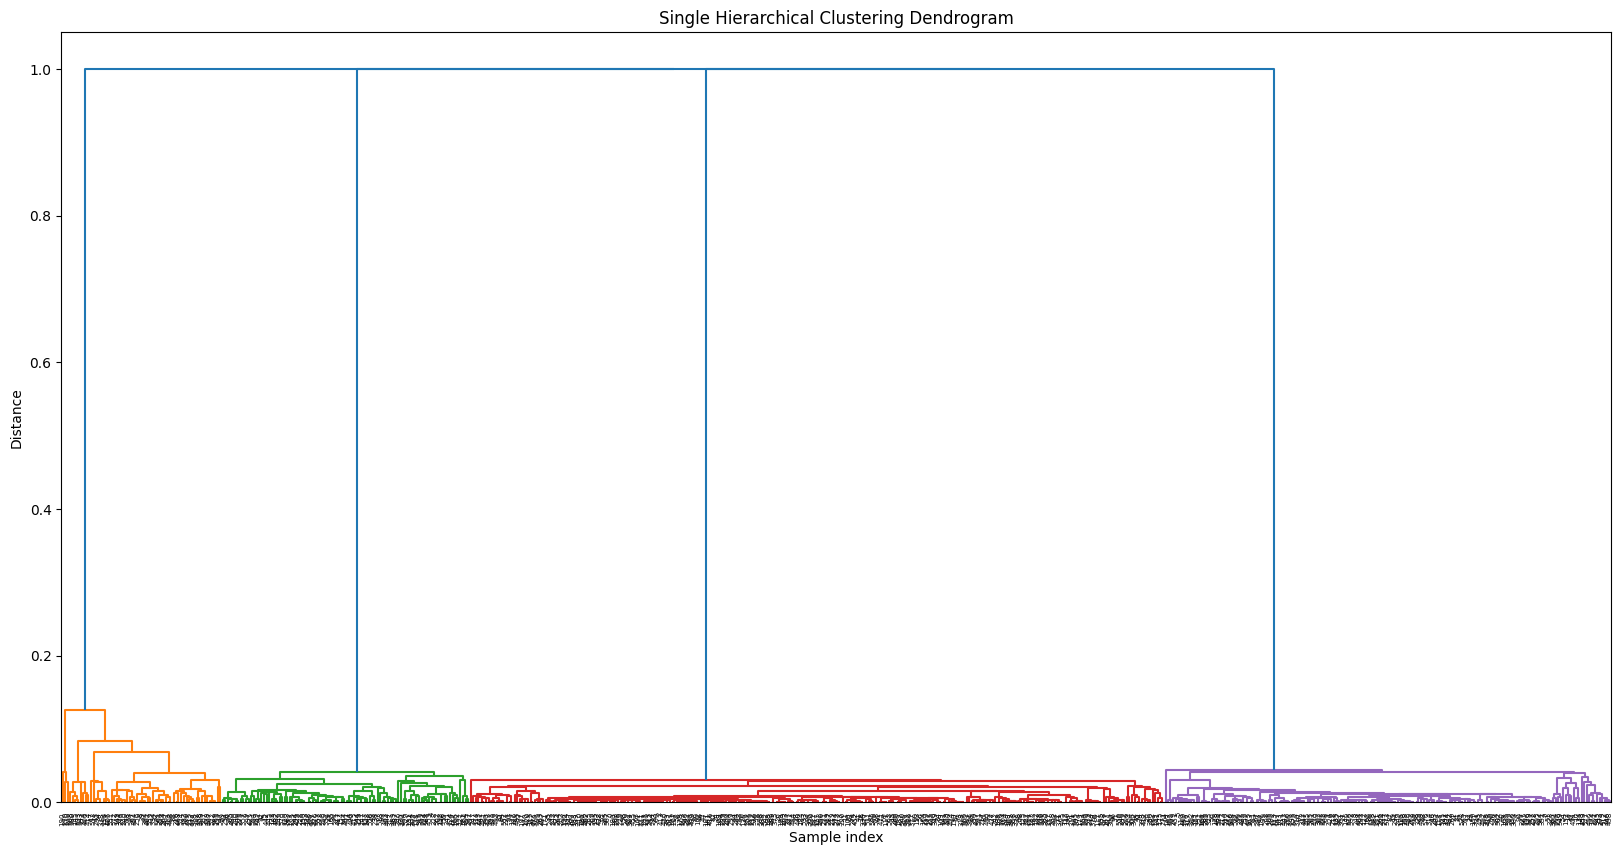

Time =  5.0940656661987305


In [38]:
start_time = time.time()
D = linkage(subset3, 'single')
# dendrogram
plt.figure(figsize=(20, 10))
plt.title('Single Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(D)
plt.show()
end_time = time.time()
print("Time = " , end_time-start_time)

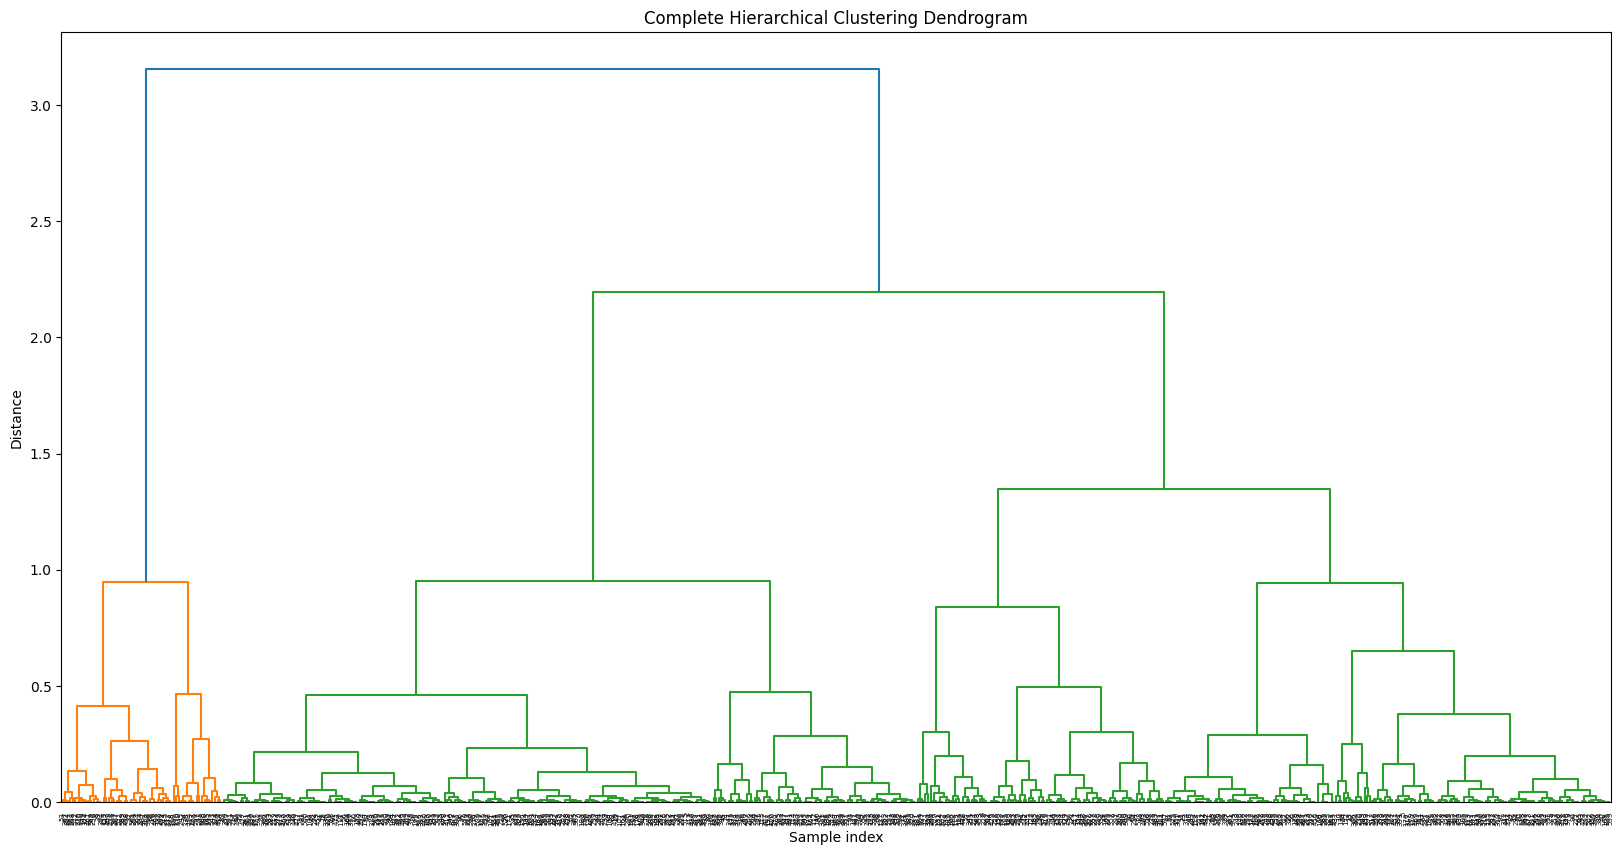

Time =  4.112738132476807


In [39]:
start_time = time.time()
D = linkage(subset3, 'complete')
# dendrogram
plt.figure(figsize=(20, 10))
plt.title('Complete Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(D)
plt.show()
end_time = time.time()
print("Time = " , end_time-start_time)

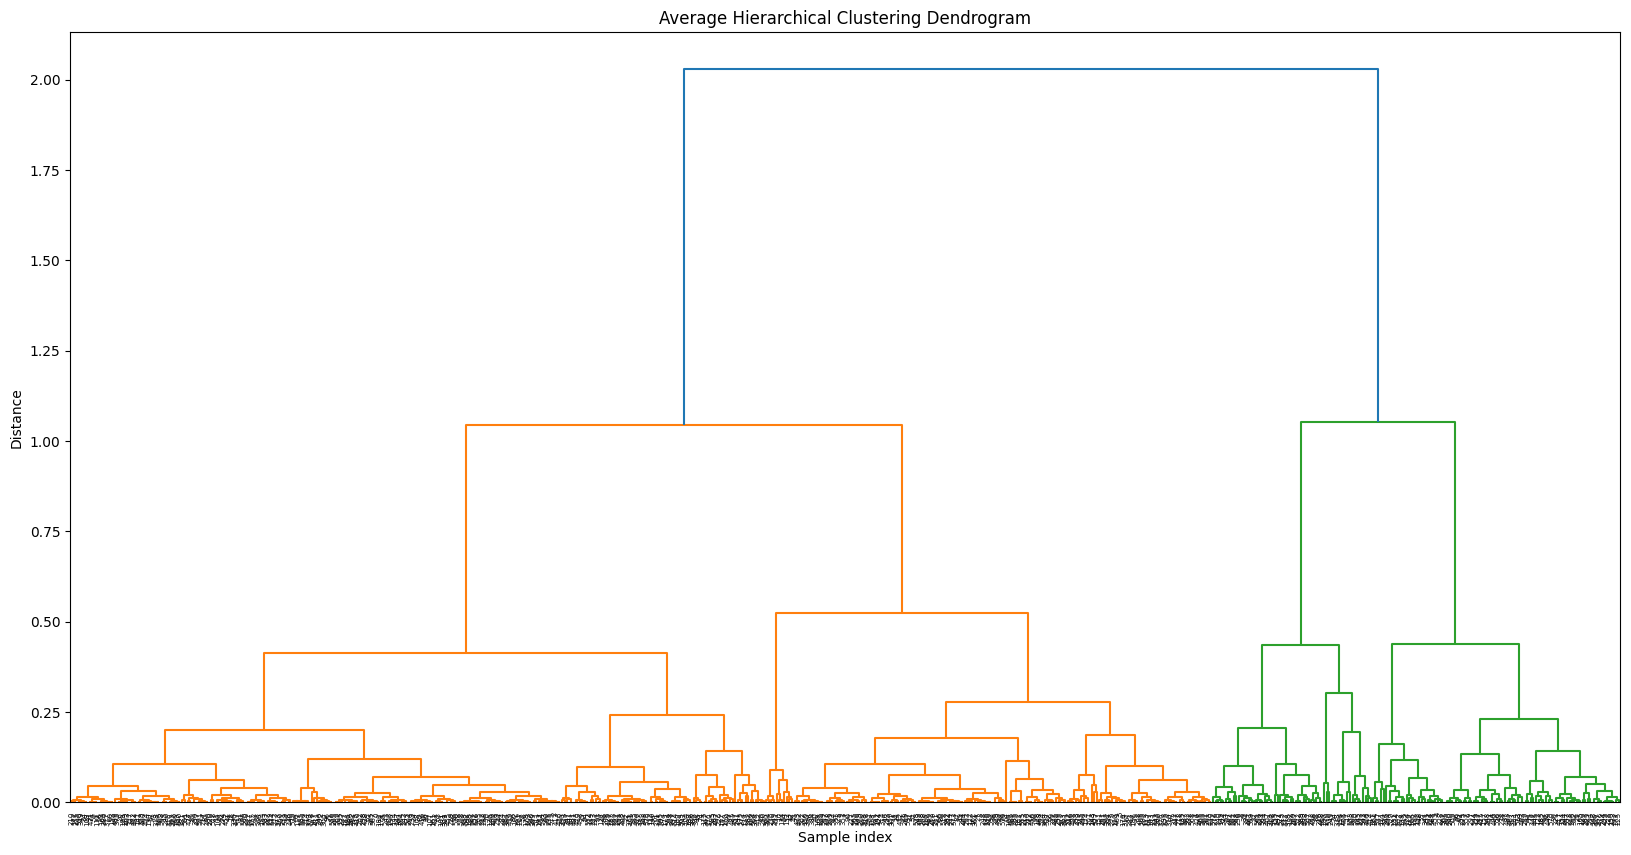

Time =  3.992833137512207


In [40]:
start_time = time.time()
D = linkage(subset3, 'average')
# dendrogram
plt.figure(figsize=(20, 10))
plt.title('Average Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(D)
plt.show()
end_time = time.time()
print("Time = " , end_time-start_time)

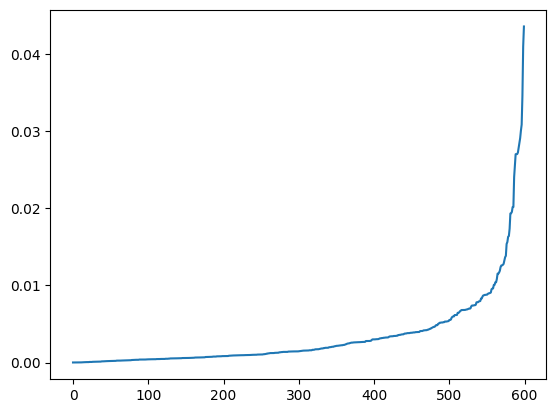

In [41]:
#This will tell us the eps
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(subset3)
distances, indices = neighbors_fit.kneighbors(subset3)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

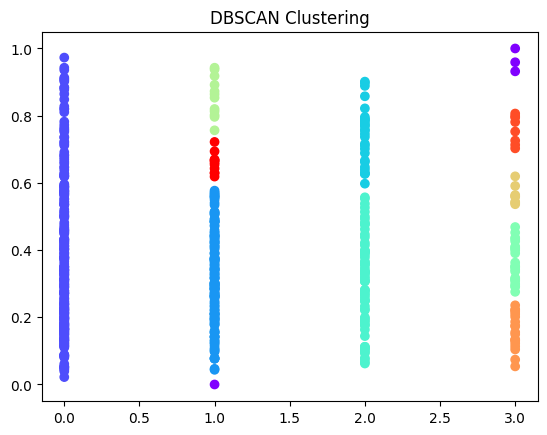

Time =  0.15456843376159668


In [42]:
start_time = time.time()
db_default = DBSCAN(eps = 0.04, min_samples = 4).fit(subset3)  
# Labelling the clusters we have created in the dataset  
labeling = db_default.labels_
plt.scatter(subset3.iloc[:,0],subset3.iloc[:,1], c=labeling, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.show()
end_time = time.time()
print("Time = " , end_time-start_time)